In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('event_log.csv')

In [5]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,2020-09-24


In [24]:
df_unique_user_and_session = df.groupby('event_date')[['user_id', 'user_session', 'event_time']].agg(['nunique', 'count'])

In [25]:
df_unique_user_and_session.head()

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-09-24    1358  2265         1446  2264       2199  2265
2020-09-25    2451  4241         2637  4241       4095  4241
2020-09-26    2030  3465         2164  3463       3363  3465
2020-09-27    2187  3851         2349  3850       3714  3851
2020-09-28    2732  4714         2913  4714       4514  4714

In [26]:
df_unique_user_and_session.columns

MultiIndex([(     'user_id', 'nunique'),
            (     'user_id',   'count'),
            ('user_session', 'nunique'),
            ('user_session',   'count'),
            (  'event_time', 'nunique'),
            (  'event_time',   'count')],
           )

In [27]:
agg_data = df_unique_user_and_session.sort_values('event_date')
agg_user_session = pd.DataFrame(
    {
        'user_count': agg_data[('user_id', 'nunique')],
        'session_count': agg_data[('user_session', 'nunique')],
        'event_count': agg_data[('event_time', 'count')]
    }
)

In [28]:
agg_user_session.head()

,user_count,session_count,event_count
event_date,,,
2020-09-24,1358,1446,2265
2020-09-25,2451,2637,4241
2020-09-26,2030,2164,3465
2020-09-27,2187,2349,3851
2020-09-28,2732,2913,4714


In [30]:
# 1) 일별 유저 세션 수
agg_user_session['session_per_user'] = agg_user_session['session_count'] / agg_user_session['user_count']

# 2) 세션별 이벤트 발생 수
agg_user_session['event_per_session'] = agg_user_session['event_count'] / agg_user_session['session_count']

Wide Format

In [31]:
agg_user_session.head()

,user_count,session_count,event_count,session_per_user,event_per_session
event_date,,,,,
2020-09-24,1358,1446,2265,1.064801,1.566390
2020-09-25,2451,2637,4241,1.075887,1.608267
2020-09-26,2030,2164,3465,1.066010,1.601201
2020-09-27,2187,2349,3851,1.074074,1.639421
2020-09-28,2732,2913,4714,1.066252,1.618263


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='event_date', ylabel='session_per_user'>

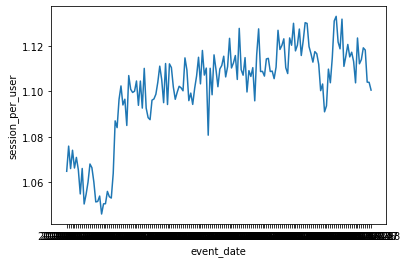

In [34]:
sns.lineplot(x='event_date', y='session_per_user', data=agg_user_session)

Long Format<br>

event_date, variable, value<br>
2020-09-24, session_per_user, 1.064801<br>
020-09-24, event_per_session, 1.566390

In [35]:
# Wide Format to Long Format
agg_user_session.reset_index()

,event_date,user_count,session_count,event_count,session_per_user,event_per_session
0,2020-09-24,1358,1446,2265,1.064801,1.566390
1,2020-09-25,2451,2637,4241,1.075887,1.608267
2,2020-09-26,2030,2164,3465,1.066010,1.601201
3,2020-09-27,2187,2349,3851,1.074074,1.639421
4,2020-09-28,2732,2913,4714,1.066252,1.618263
...,...,...,...,...,...,...
153,2021-02-24,2904,3250,5803,1.119146,1.785538
154,2021-02-25,2784,3113,5647,1.118175,1.814006
155,2021-02-26,2960,3268,5864,1.104054,1.794370
156,2021-02-27,2578,2846,4933,1.103957,1.733310


In [37]:
melted = pd.melt(
    agg_user_session.reset_index(),
    id_vars=['event_date'],
    value_vars=['session_per_user', 'event_per_session']
)

In [38]:
melted.head()

,event_date,variable,value
0,2020-09-24,session_per_user,1.064801
1,2020-09-25,session_per_user,1.075887
2,2020-09-26,session_per_user,1.066010
3,2020-09-27,session_per_user,1.074074
4,2020-09-28,session_per_user,1.066252


In [51]:
melted.tail()

,event_date,variable,value
311,2021-02-24,event_per_session,1.785538
312,2021-02-25,event_per_session,1.814006
313,2021-02-26,event_per_session,1.794370
314,2021-02-27,event_per_session,1.733310
315,2021-02-28,event_per_session,1.724951


In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Text(0, 0.5, 'variable')

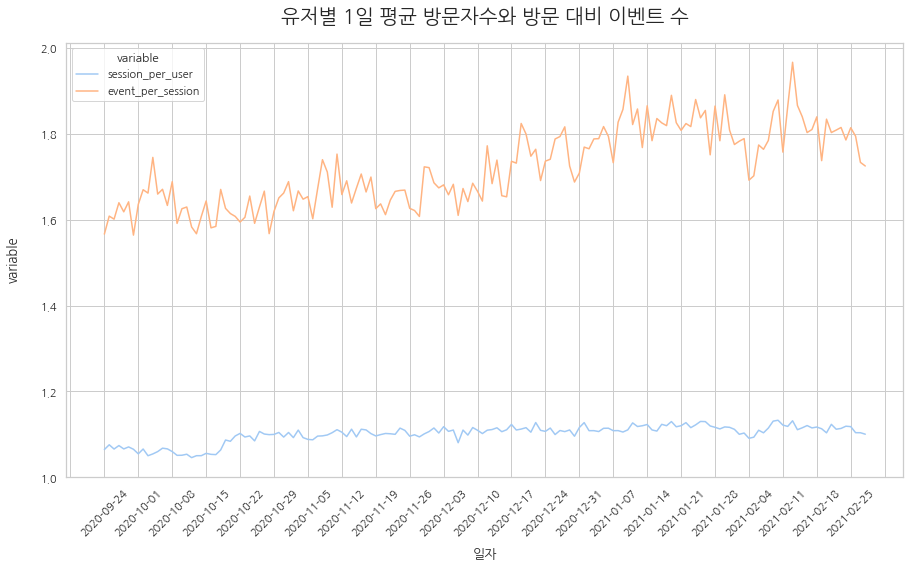

In [59]:
sns.set_theme(style="whitegrid", palette='pastel')
plt.rc('font', family='NanumGothic')
plt.xticks(rotation=45)

g = sns.lineplot(x='event_date', y='value', hue='variable', data=melted)
g.figure.set_size_inches(15, 8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))
g.set_title('유저별 1일 평균 방문자수와 방문 대비 이벤트 수', pad=20, size=20)
g.set_xlabel('일자', labelpad=10, size=13)
g.set_ylabel('variable', labelpad=20, size=13)